### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(401, 327)
(401, 324)
(401,)
(21, 327)
(21, 324)
(21,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(750, 324) (750,)
(750, 324) (750,)


In [4]:
# GaussianNB, GridSearch
k_folds = 10

parameters = {
    'var_smoothing' : [j / np.power(10,x) for x in range(1,10) for j in range(1,10)]
}
cnb = GaussianNB()
grid_search_gaussian = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.2218
var_smoothing => 0.9
Splits: 10
Vanilla Train Accuracy: 30.9227%
Vanilla Validation Accuracy: 4.76%


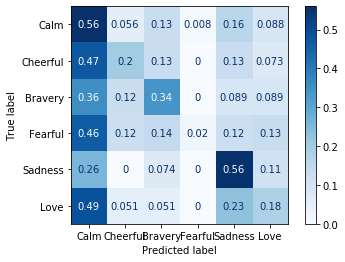

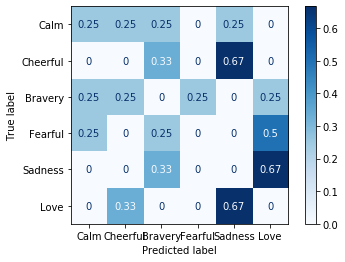

In [5]:
print_res("Vanilla",x_train,y_train,grid_search_gaussian)
test_res("Vanilla",x_val,y_val,grid_search_gaussian)

Best Score: 0.3187
var_smoothing => 0.08
Splits: 10
Random Oversampling Train Accuracy: 38.0000%
Random Oversampling Validation Accuracy: 19.05%


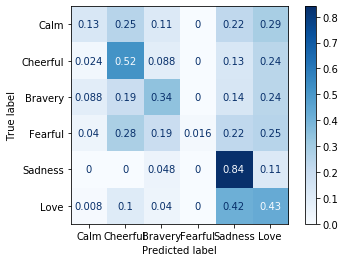

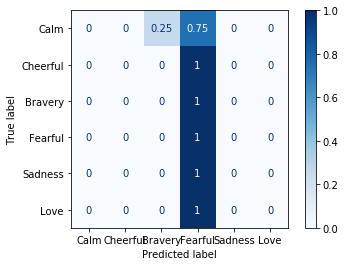

In [6]:
print_res("Random Oversampling",x_os,y_os,grid_search_gaussian)
test_res("Random Oversampling",x_val,y_val,grid_search_gaussian)

Best Score: 0.3520
var_smoothing => 4e-05
Splits: 10
SMOTE Train Accuracy: 40.0000%
SMOTE Validation Accuracy: 19.05%


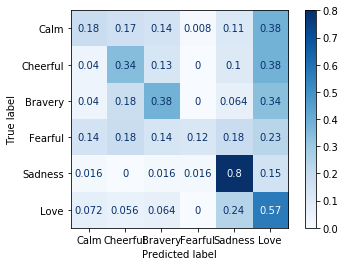

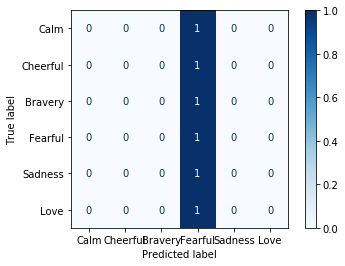

In [7]:
print_res("SMOTE",x_smote,y_smote,grid_search_gaussian)
test_res("SMOTE",x_val,y_val,grid_search_gaussian)

In [8]:
# MultinomialNB, Grid Search
k_folds = 10
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.3241
alpha => 0.01
fit_prior => True
Splits: 10
Vanilla Train Accuracy: 34.1646%
Vanilla Validation Accuracy: 19.05%


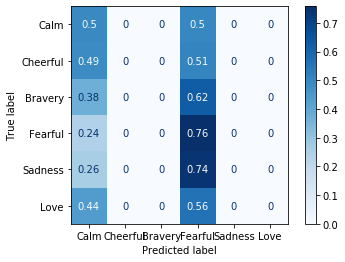

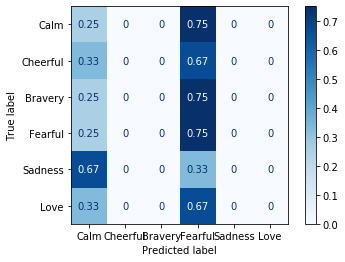

In [9]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_multinomial)
test_res("Vanilla",x_val[:,:5],y_val,grid_search_multinomial)

Best Score: 0.2373
alpha => 0.01
fit_prior => True
Splits: 10
Random Oversampling Train Accuracy: 26.5333%
Random Oversampling Validation Accuracy: 19.05%


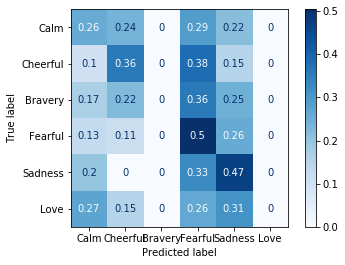

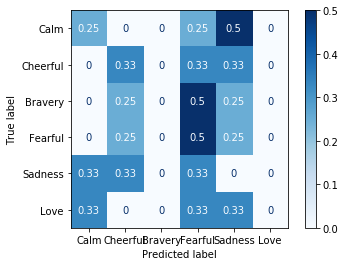

In [10]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_multinomial)
test_res("Random Oversampling",x_val[:,:5],y_val,grid_search_multinomial)

Best Score: 0.2453
alpha => 0.98
fit_prior => False
Splits: 10
SMOTE Train Accuracy: 28.0000%
SMOTE Validation Accuracy: 19.05%


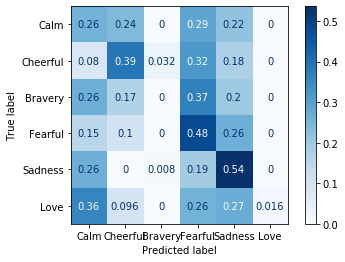

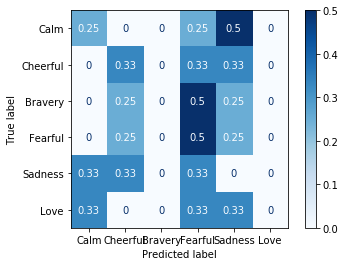

In [11]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_multinomial)
test_res("SMOTE",x_val[:,:5],y_val,grid_search_multinomial)

In [12]:
# CategoricalNB, Grid Search
k_folds = 10
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=k_folds)

Best Score: 0.3366
alpha => 0.01
fit_prior => True
Splits: 10
Vanilla Train Accuracy: 34.1646%
Vanilla Validation Accuracy: 19.05%


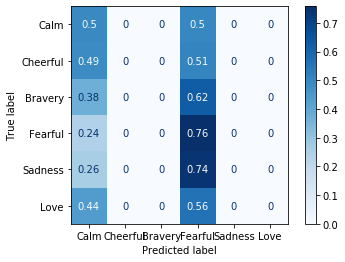

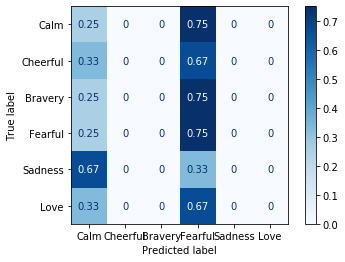

In [13]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_categorical)
test_res("Vanilla",x_val[:,:5],y_val,grid_search_categorical)

Best Score: 0.2787
alpha => 0.01
fit_prior => False
Splits: 10
Random Oversampling Train Accuracy: 29.0667%
Random Oversampling Validation Accuracy: 23.81%


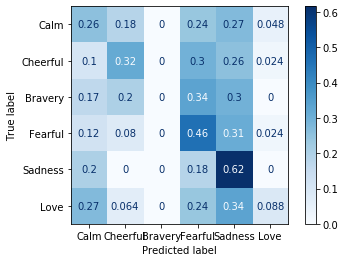

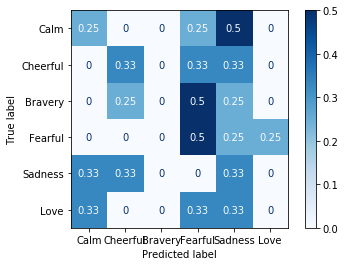

In [14]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_categorical)
test_res("Random Oversampling",x_val[:,:5],y_val,grid_search_categorical)

Best Score: 0.2840
alpha => 0.86
fit_prior => True
Splits: 10
SMOTE Train Accuracy: 30.8000%
SMOTE Validation Accuracy: 19.05%


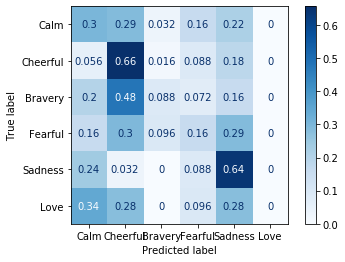

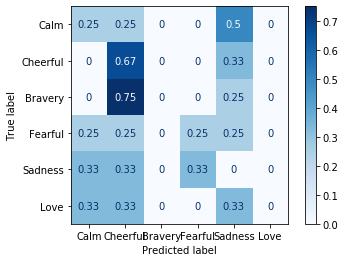

In [15]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_categorical)
test_res("SMOTE",x_val[:,:5],y_val,grid_search_categorical)

In [16]:
# ComplementNB, Grid Search
k_folds = 10
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False], 
    'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.3117
alpha => 0.01
fit_prior => True
norm => True
Splits: 10
Vanilla Train Accuracy: 31.4214%
Vanilla Validation Accuracy: 19.05%


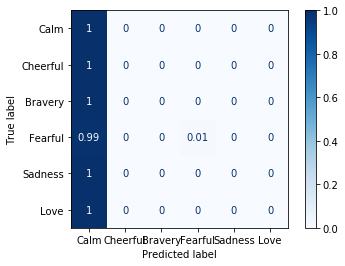

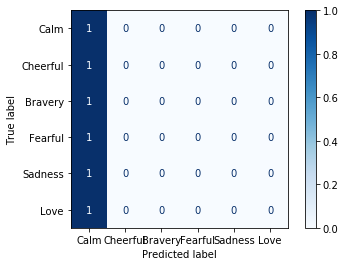

In [17]:
print_res("Vanilla",x_train,y_train,grid_search_complement)
test_res("Vanilla",x_val,y_val,grid_search_complement)

Best Score: 0.3080
alpha => 0.6900000000000001
fit_prior => True
norm => False
Splits: 10
Random Oversampling Train Accuracy: 33.6000%
Random Oversampling Validation Accuracy: 9.52%


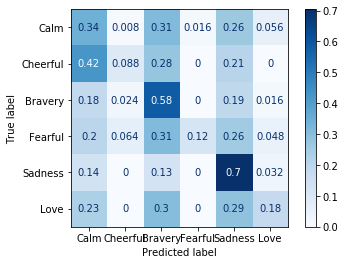

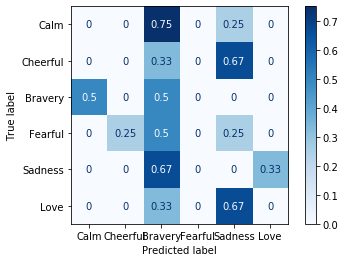

In [18]:
print_res("Random Oversampling",x_os,y_os,grid_search_complement)
test_res("Random Oversampling",x_val,y_val,grid_search_complement)

Best Score: 0.2880
alpha => 0.05
fit_prior => True
norm => False
Splits: 10
SMOTE Train Accuracy: 32.9333%
SMOTE Validation Accuracy: 14.29%


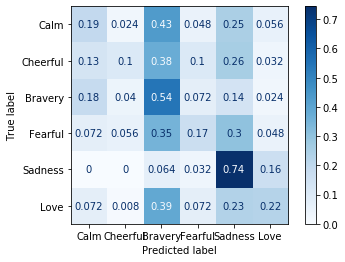

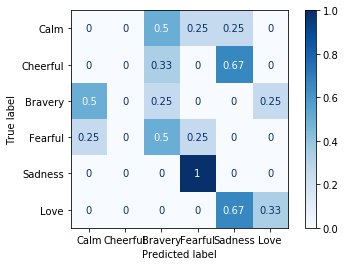

In [19]:
print_res("SMOTE",x_smote,y_smote,grid_search_complement)
test_res("SMOTE",x_val,y_val,grid_search_complement)

In [20]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10
rand_seed = 3249807

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False], 
    'norm' : [True, False]
}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

Best Score: 0.3117
alpha => 0.2274339734782188
fit_prior => True
norm => True
Splits: 10
Vanilla Train Accuracy: 31.4214%
Vanilla Validation Accuracy: 19.05%


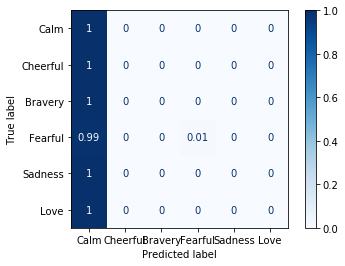

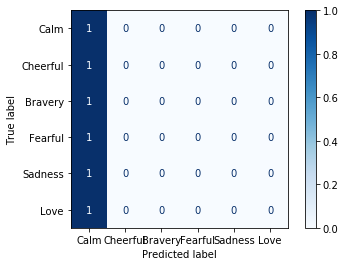

In [21]:
print_res("Vanilla",x_train,y_train,random_search_complement)
test_res("Vanilla",x_val,y_val,random_search_complement)

Best Score: 0.3080
alpha => 0.849198710333721
fit_prior => False
norm => False
Splits: 10
Random Oversampling Train Accuracy: 33.6000%
Random Oversampling Validation Accuracy: 9.52%


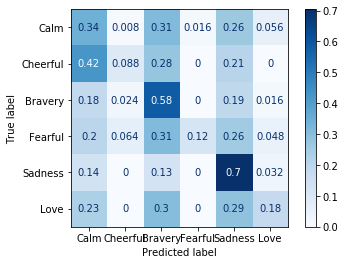

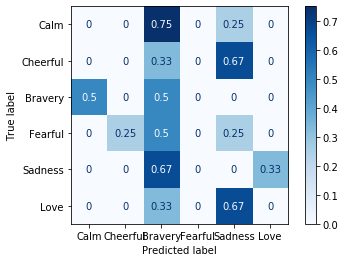

In [22]:
print_res("Random Oversampling",x_os,y_os,random_search_complement)
test_res("Random Oversampling",x_val,y_val,random_search_complement)

Best Score: 0.2880
alpha => 0.2557277072168217
fit_prior => False
norm => False
Splits: 10
SMOTE Train Accuracy: 32.8000%
SMOTE Validation Accuracy: 32.80%


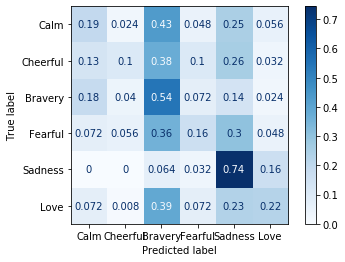

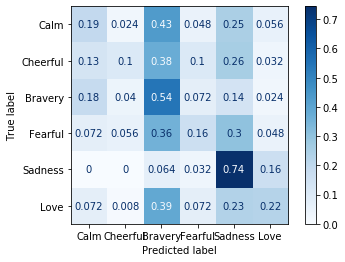

In [23]:
print_res("SMOTE",x_smote,y_smote,random_search_complement)
test_res("SMOTE",x_smote,y_smote,random_search_complement)

In [24]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,\
                                           n_iter=random_search_iterations,\
                                            random_state=rand_seed)

Best Score: 0.3366
alpha => 0.010145991301233392
fit_prior => True
Splits: 10
Vanilla Train Accuracy: 34.1646%
Vanilla Validation Accuracy: 19.05%


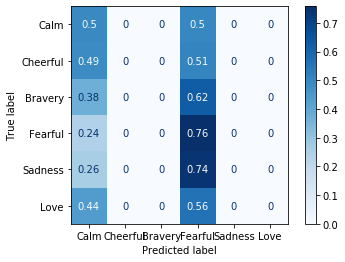

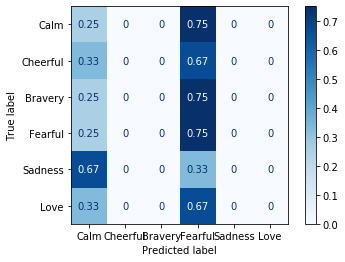

In [25]:
print_res("Vanilla",x_train[:,:5],y_train,random_search_categorical)
test_res("Vanilla",x_val[:,:5],y_val,random_search_categorical)

Best Score: 0.2787
alpha => 0.043182234745824055
fit_prior => False
Splits: 10
Random Oversampling Train Accuracy: 29.0667%
Random Oversampling Validation Accuracy: 23.81%


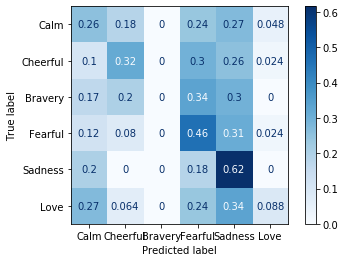

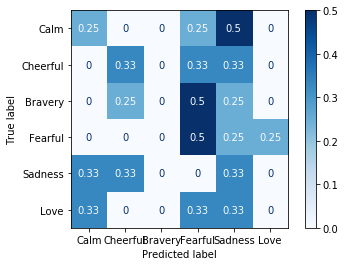

In [26]:
print_res("Random Oversampling",x_os[:,:5],y_os,random_search_categorical)
test_res("Random Oversampling",x_val[:,:5],y_val,random_search_categorical)

Best Score: 0.2840
alpha => 0.8781474012829417
fit_prior => True
Splits: 10
SMOTE Train Accuracy: 30.8000%
SMOTE Validation Accuracy: 19.05%


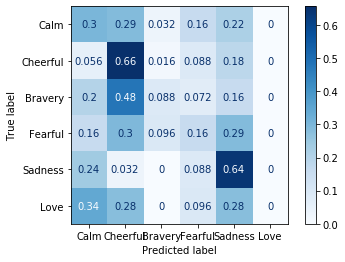

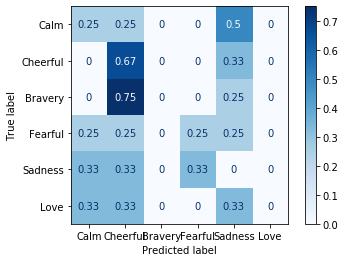

In [27]:
print_res("SMOTE",x_smote[:,:5],y_smote,random_search_categorical)
test_res("SMOTE",x_val[:,:5],y_val,random_search_categorical)

In [28]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 10

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                            n_iter=random_search_iterations,\
                                            random_state=rand_seed,n_jobs=-1)

Best Score: 0.3167
alpha => 0.9801488008772941
fit_prior => True
Splits: 10
Vanilla Train Accuracy: 36.1596%
Vanilla Validation Accuracy: 19.05%


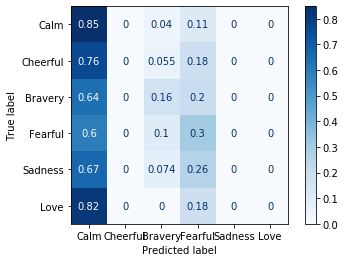

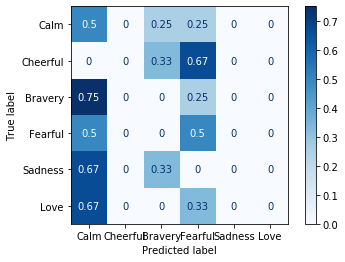

In [29]:
print_res("Vanilla",x_train,y_train,random_search_multinomial)
test_res("Vanilla",x_val,y_val,random_search_multinomial)

Best Score: 0.3200
alpha => 0.24423872309159544
fit_prior => True
Splits: 10
Random Oversampling Train Accuracy: 34.0000%
Random Oversampling Validation Accuracy: 14.29%


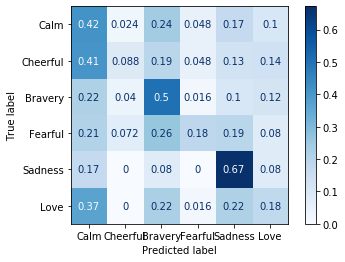

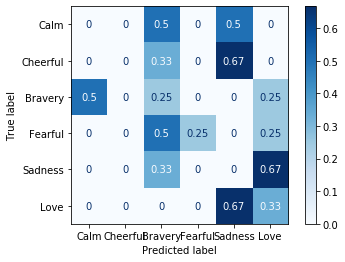

In [30]:
print_res("Random Oversampling",x_os,y_os,random_search_multinomial)
test_res("Random Oversampling",x_val,y_val,random_search_multinomial)

Best Score: 0.2867
alpha => 0.4501283492270539
fit_prior => False
Splits: 10
SMOTE Train Accuracy: 35.0667%
SMOTE Validation Accuracy: 9.52%


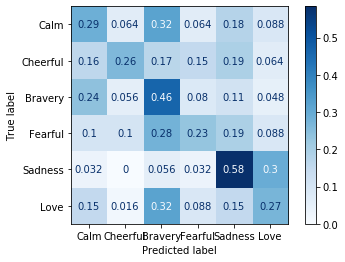

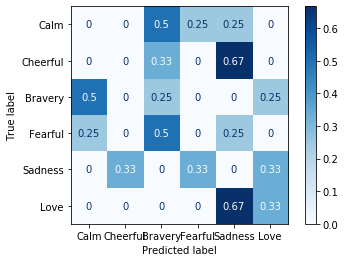

In [31]:
print_res("SMOTE",x_smote,y_smote,random_search_multinomial)
test_res("SMOTE",x_val,y_val,random_search_multinomial)